In [ ]:
import math
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import signal
from sbox import Sbox
import ciphers
import time

sb_ediesca=[243, 130, 238, 170, 157, 85, 151, 139, 164, 253, 89, 201, 70, 42, 230, 28, 74, 0, 31, 120, 101, 79, 141, 106, 125, 119, 241, 1, 121, 91, 161, 100, 199, 51, 150, 191, 72, 207, 214, 21, 218, 49, 183, 80, 179, 165, 9, 195, 209, 34, 138, 192, 99, 6, 115, 65, 152, 174, 7, 124, 20, 197, 155, 17, 109, 67, 208, 163, 2, 69, 145, 252, 44, 75, 12, 60, 237, 185, 22, 36, 216, 37, 104, 168, 59, 187, 128, 166, 233, 215, 118, 111, 206, 84, 213, 134, 149, 171, 73, 248, 32, 50, 33, 148, 159, 131, 143, 103, 43, 71, 61, 198, 133, 88, 40, 56, 114, 245, 136, 200, 190, 202, 181, 107, 29, 94, 87, 110, 11, 26, 244, 255, 246, 247, 14, 108, 186, 62, 235, 222, 182, 232, 140, 63, 98, 193, 3, 126, 221, 240, 97, 24, 212, 113, 66, 58, 234, 254, 158, 83, 102, 19, 135, 95, 156, 23, 250, 123, 41, 162, 219, 178, 4, 47, 127, 76, 45, 55, 203, 204, 236, 54, 251, 82, 176, 223, 142, 30, 177, 144, 184, 217, 160, 78, 153, 231, 129, 38, 146, 132, 194, 116, 64, 147, 16, 13, 92, 188, 8, 96, 227, 18, 220, 189, 172, 52, 173, 167, 229, 210, 35, 154, 5, 68, 122, 175, 53, 249, 169, 48, 196, 205, 57, 117, 112, 10, 180, 25, 226, 211, 224, 81, 39, 242, 93, 27, 105, 90, 77, 86, 225, 137, 228, 15, 239, 46]
sb_nl96 = [110, 104, 108, 126, 204, 2, 20, 109, 48, 90, 114, 8, 252, 226, 107, 163, 102, 31, 158, 105, 225, 141, 16, 85, 232, 161, 175, 177, 115, 88, 134, 146, 92, 98, 47, 148, 55, 210, 130, 81, 224, 99, 40, 165, 162, 164, 229, 3, 160, 37, 50, 97, 168, 41, 183, 205, 113, 221, 192, 59, 184, 136, 86, 111, 151, 242, 32, 194, 65, 208, 9, 91, 182, 231, 198, 189, 72, 203, 106, 131, 238, 73, 153, 135, 38, 222, 6, 101, 60, 173, 46, 223, 191, 100, 196, 176, 11, 245, 71, 66, 70, 93, 10, 76, 230, 89, 42, 123, 64, 235, 207, 22, 211, 29, 213, 140, 249, 216, 74, 178, 219, 174, 171, 243, 35, 33, 127, 25, 57, 133, 142, 124, 24, 179, 26, 112, 45, 78, 152, 181, 17, 172, 30, 247, 149, 132, 39, 138, 67, 1, 215, 241, 69, 228, 96, 143, 13, 166, 188, 118, 201, 121, 80, 44, 234, 56, 167, 52, 125, 197, 254, 62, 255, 169, 84, 5, 49, 150, 0, 157, 144, 129, 227, 15, 61, 187, 155, 147, 128, 156, 63, 18, 82, 77, 185, 75, 122, 12, 244, 209, 233, 4, 170, 87, 103, 220, 180, 53, 117, 21, 23, 186, 95, 83, 139, 28, 19, 34, 212, 193, 159, 116, 7, 253, 236, 137, 79, 239, 190, 94, 250, 202, 217, 214, 154, 68, 251, 206, 246, 54, 200, 199, 51, 145, 27, 195, 240, 237, 218, 248, 58, 36, 43, 14, 120, 119]
sbox_orbit2 = [96, 168, 227, 110, 47, 237, 164, 90, 31, 158, 218, 69, 14, 74, 151, 213, 41, 209, 23, 116, 184, 239, 174, 98, 38, 191, 244, 199, 119, 54, 2, 15, 104, 175, 232, 136, 68, 13, 147, 210, 25, 127, 194, 247, 211, 128, 62, 8, 45, 214, 130, 63, 10, 52, 134, 251, 145, 75, 19, 99, 171, 229, 120, 55, 3, 107, 177, 234, 146, 76, 20, 101, 173, 230, 60, 7, 40, 124, 245, 201, 18, 106, 233, 143, 93, 166, 225, 203, 255, 250, 159, 86, 28, 144, 207, 72, 149, 34, 26, 132, 197, 226, 140, 71, 16, 83, 202, 253, 243, 154, 82, 193, 246, 192, 205, 123, 58, 5, 29, 115, 36, 183, 170, 95, 35, 180, 236, 157, 85, 27, 138, 254, 137, 242, 153, 24, 125, 122, 56, 4, 111, 181, 161, 88, 167, 103, 42, 219, 84, 169, 48, 195, 51, 0, 109, 46, 135, 67, 22, 112, 182, 163, 114, 179, 235, 152, 81, 189, 1, 249, 141, 11, 200, 105, 176, 70, 148, 150, 212, 133, 198, 73, 92, 165, 224, 97, 37, 187, 185, 43, 65, 57, 129, 248, 217, 204, 252, 160, 87, 33, 162, 89, 30, 215, 50, 156, 142, 17, 223, 91, 32, 221, 121, 113, 49, 222, 220, 78, 216, 9, 196, 118, 102, 231, 131, 64, 79, 240, 39, 66, 12, 206, 208, 188, 238, 94, 139, 155, 190, 59, 6, 108, 241, 172, 126, 228, 53, 117, 100, 44, 61, 80, 186, 21, 178, 77]
sbox_orbit = [14, 73, 150, 212, 36, 184, 239, 171, 96, 181, 236, 159, 86, 28, 142, 206, 5, 114, 183, 238, 169, 94, 34, 174, 231, 134, 66, 12, 63, 143, 7, 39, 123, 190, 244, 198, 117, 53, 1, 10, 100, 172, 229, 58, 29, 115, 167, 93, 120, 55, 3, 18, 106, 177, 233, 74, 226, 105, 43, 217, 60, 38, 122, 189, 243, 194, 51, 0, 2, 166, 225, 102, 41, 207, 13, 67, 145, 208, 104, 42, 213, 40, 201, 253, 241, 152, 81, 24, 193, 50, 240, 151, 80, 23, 119, 187, 242, 186, 108, 46, 65, 144, 68, 146, 209, 21, 178, 234, 149, 78, 22, 112, 182, 237, 163, 90, 31, 157, 133, 250, 91, 164, 223, 11, 59, 139, 203, 254, 249, 158, 141, 205, 15, 175, 232, 137, 69, 37, 188, 110, 47, 165, 32, 162, 222, 64, 8, 45, 128, 247, 214, 130, 52, 199, 251, 19, 227, 49, 246, 97, 185, 101, 44, 224, 99, 196, 248, 219, 136, 252, 79, 116, 176, 197, 140, 71, 16, 82, 218, 70, 148, 211, 30, 17, 92, 33, 204, 255, 161, 88, 147, 121, 192, 113, 4, 111, 61, 48, 89, 153, 98, 230, 126, 76, 20, 131, 200, 195, 235, 160, 87, 125, 191, 245, 57, 27, 85, 179, 103, 107, 77, 156, 62, 9, 220, 135, 210, 228, 72, 221, 26, 173, 129, 25, 132, 138, 54, 75, 6, 84, 180, 202, 154, 83, 95, 35, 170, 56, 124, 118, 215, 216, 155, 109, 127, 168]
sbox_mixedtest = [89, 28, 150, 81, 182, 253, 83, 167, 121, 183, 92, 128, 79, 124, 138, 166, 247, 148, 151, 7, 159, 37, 45, 146, 233, 112, 248, 22, 243, 171, 46, 66, 103, 97, 101, 142, 234, 162, 199, 175, 17, 8, 52, 68, 132, 98, 12, 203, 70, 240, 75, 20, 15, 84, 221, 104, 189, 110, 76, 251, 194, 200, 113, 222, 69, 116, 72, 229, 185, 252, 44, 80, 164, 231, 27, 115, 155, 39, 177, 26, 134, 71, 64, 204, 102, 48, 217, 35, 208, 156, 90, 191, 219, 33, 106, 210, 95, 61, 186, 181, 126, 165, 143, 230, 250, 228, 47, 249, 223, 235, 238, 147, 201, 14, 11, 152, 56, 63, 193, 2, 192, 131, 206, 86, 50, 114, 57, 32, 73, 62, 157, 190, 109, 163, 149, 136, 224, 169, 211, 125, 51, 225, 205, 140, 3, 31, 239, 82, 13, 197, 99, 135, 141, 168, 30, 43, 184, 42, 173, 4, 34, 215, 85, 111, 94, 161, 174, 55, 77, 176, 24, 170, 18, 6, 74, 137, 117, 1, 108, 120, 122, 158, 202, 91, 227, 123, 16, 255, 105, 21, 232, 23, 41, 180, 244, 78, 209, 59, 179, 226, 133, 187, 236, 49, 127, 9, 96, 172, 10, 93, 54, 19, 198, 65, 241, 87, 178, 129, 212, 38, 214, 220, 188, 154, 53, 160, 246, 100, 58, 242, 218, 237, 145, 60, 213, 88, 25, 207, 118, 139, 29, 216, 130, 153, 40, 144, 67, 107, 195, 5, 196, 36, 119, 0, 245, 254]
sbox_mixedtseries = [71, 121, 25, 232, 29, 38, 76, 173, 70, 178, 150, 78, 255, 3, 141, 128, 26, 4, 175, 181, 222, 111, 39, 56, 107, 215, 144, 66, 65, 85, 162, 237, 185, 131, 171, 177, 67, 88, 117, 43, 205, 21, 180, 36, 187, 248, 123, 54, 129, 240, 200, 134, 176, 249, 81, 84, 214, 251, 223, 155, 24, 161, 73, 154, 53, 17, 164, 168, 61, 193, 101, 104, 157, 231, 169, 166, 199, 254, 49, 59, 220, 217, 58, 37, 151, 216, 219, 152, 55, 197, 192, 244, 132, 213, 156, 16, 34, 135, 112, 13, 160, 182, 165, 28, 113, 91, 210, 20, 0, 94, 125, 228, 239, 44, 130, 30, 109, 183, 15, 170, 40, 77, 41, 1, 208, 252, 202, 108, 87, 133, 10, 75, 68, 5, 50, 186, 46, 195, 122, 57, 147, 47, 174, 142, 250, 45, 18, 127, 83, 110, 207, 62, 8, 114, 93, 230, 241, 116, 225, 158, 52, 74, 92, 51, 194, 9, 191, 242, 60, 235, 203, 35, 22, 19, 172, 233, 126, 146, 6, 238, 79, 189, 124, 139, 143, 201, 119, 12, 100, 229, 167, 86, 98, 82, 246, 211, 159, 224, 145, 245, 23, 226, 196, 11, 14, 33, 32, 243, 27, 42, 209, 90, 63, 153, 179, 218, 137, 69, 148, 190, 105, 253, 106, 64, 118, 96, 149, 140, 103, 212, 188, 247, 80, 48, 138, 198, 115, 2, 89, 72, 136, 7, 95, 99, 227, 206, 234, 221, 97, 236, 163, 204, 102, 120, 31, 184]
sboxog = [49, 160, 46, 206, 152, 105, 230, 198, 93, 146, 67, 181, 88, 68, 103, 126,254, 237, 64, 131, 232, 173, 204, 65, 22, 63, 133, 192, 168, 62, 202, 153,4, 116, 239, 229, 220, 205, 48, 167, 214, 155, 69, 41, 127, 121, 193, 107,29, 215, 231, 238, 12, 61, 200, 96, 161, 82, 38, 24, 221, 250, 14, 35,32, 70, 209, 118, 122, 36, 101, 186, 140, 234, 248, 149, 185, 28, 50, 1,97, 242, 189, 171, 78, 175, 102, 178, 94, 123, 218, 240, 114, 182, 115, 199,253, 144, 172, 113, 134, 176, 100, 191, 177, 190, 25, 72, 170, 139, 20, 53,90, 77, 109, 79, 40, 60, 42, 235, 31, 157, 98, 106, 54, 15, 89, 203,255, 26, 80, 174, 2, 162, 10, 18, 164, 128, 196, 136, 252, 223, 86, 228,210, 13, 151, 213, 217, 201, 117, 124, 233, 11, 135, 59, 6, 245, 225, 95,56, 39, 71, 99, 148, 27, 184, 47, 17, 154, 83, 241, 145, 187, 9, 226,169, 244, 74, 158, 23, 66, 85, 147, 207, 194, 150, 37, 92, 57, 81, 141,227, 212, 87, 219, 243, 52, 137, 142, 166, 73, 45, 125, 156, 129, 84, 208,216, 91, 179, 246, 104, 180, 197, 222, 163, 51, 76, 58, 44, 0, 108, 110,19, 43, 30, 224, 55, 3, 247, 120, 188, 251, 119, 130, 211, 236, 249, 159,75, 195, 8, 111, 143, 16, 112, 165, 34, 33, 132, 5, 183, 7, 21, 138]
sbox0 = [156,84,26,121,56,4,236,148,78,21,147,77,153,81,24,133,65,12,199,118,54,2,242,82,25,66,195,115,51,1,249,159,86,28,116,52,0,251,160,87,29,111,48,14,189,110,47,16,178,102,40,3,237,149,22,76,20,152,136,68,185,107,45,32,95,36,79,143,74,19,164,90,31,96,132,11,202,120,55,150,141,72,17,173,97,37,187,109,46,23,140,71,174,98,38,67,13,154,83,129,62,9,209,126,60,7,220,135,166,92,33,250,112,49,8,215,131,64,10,201,239,200,119,151,80,142,168,93,34,15,179,103,42,18,163,89,44,35,146,155,124,58,6,228,169,203,233,145,158,85,27,252,161,88,162,73,94,128,61,212,63,210,127,213,130,208,125,59,221,238,144,30,106,69,183,190,198,53,245,217,117,246,123,57,5,171,165,91,211,206,225,139,70,176,100,39,218,134,108,192,113,204,122,232,75,243,234,244,188,137,227,170,50,230,41,193,254,104,43,99,219,194,114,216,222,231,105,223,182,207,177,101,175,240,180,138,181,226,197,186,214,248,191,253,224,247,157,167,229,184,255,205,235,172,241,196]
sbox_logistic = [8, 195, 2, 130, 142, 128, 75, 60, 40, 248, 178, 117, 225, 34, 169, 212,85, 3, 244, 222, 122, 246, 110, 206, 181, 95, 131, 89, 18, 104, 37, 47,16, 151, 118, 239, 228, 199, 154, 149, 5, 236, 42, 142, 34, 147, 255, 100,1, 240, 254, 9, 41, 243, 64, 135, 229, 53, 21, 103, 73, 173, 6, 214,78, 97, 98, 31, 230, 59, 231, 189, 120, 235, 234, 87, 237, 226, 249, 217,51, 137, 233, 204, 207, 105, 24, 213, 114, 48, 183, 187, 17, 201, 132, 245,106, 170, 172, 140, 58, 148, 202, 193, 50, 204, 80, 180, 113, 68, 152, 121,36, 156, 134, 29, 232, 141, 115, 82, 205, 223, 193, 102, 251, 174, 46, 125,192, 132, 136, 137, 147, 33, 154, 135, 239, 10, 38, 54, 148, 116, 74, 253,168, 66, 138, 83, 71, 61, 112, 171, 127, 165, 223, 142, 123, 182, 214, 242,108, 175, 65, 133, 198, 27, 171, 216, 4, 49, 39, 32, 72, 186, 246, 52,153, 162, 216, 99, 31, 218, 213, 120, 69, 107, 203, 6, 47, 15, 29, 108,161, 185, 79, 209, 11, 94, 101, 159, 224, 166, 182, 63, 238, 90, 238, 138,150, 167, 252, 25, 1, 30, 111, 118, 119, 163, 143, 77, 144, 167, 248, 238,86, 38, 191, 158, 62, 139, 74, 218, 157, 160, 197, 80, 82, 157, 55, 125,179, 184, 153, 188, 215, 145, 155, 20, 196, 109, 219, 146, 242, 250, 253, 227]
sbmarce = [0, 228, 211, 223, 18, 141, 12, 111, 45, 62, 129, 126, 30, 91, 93, 21,114, 92, 218, 68, 214, 117, 64, 13, 16, 188, 78, 246, 144, 155, 115, 234,207, 221, 69, 150, 72, 176, 105, 170, 209, 174, 97, 100, 201, 160, 103, 168,29, 219, 146, 75, 249, 113, 65, 3, 112, 74, 241, 134, 210, 130, 222, 26,36, 197, 9, 226, 28, 204, 14, 39, 180, 152, 81, 235, 82, 225, 104, 59,88, 229, 242, 143, 2, 67, 102, 123, 122, 172, 173, 119, 247, 58, 161, 184,24, 128, 61, 6, 56, 4, 8, 7, 106, 83, 202, 110, 120, 22, 165, 179,33, 85, 86, 131, 37, 183, 94, 167, 48, 66, 227, 163, 138, 77, 215, 136,90, 32, 53, 148, 162, 51, 220, 47, 54, 159, 151, 195, 27, 248, 233, 99,76, 178, 157, 181, 31, 137, 87, 231, 35, 199, 118, 25, 251, 205, 182, 95,107, 156, 200, 101, 1, 244, 166, 132, 187, 5, 254, 19, 40, 255, 79, 127,142, 193, 140, 55, 149, 63, 239, 50, 240, 125, 171, 116, 206, 213, 42, 189,60, 73, 41, 109, 208, 43, 15, 121, 108, 70, 10, 250, 20, 23, 185, 98,11, 145, 196, 34, 80, 245, 153, 243, 253, 175, 191, 238, 203, 224, 124, 17,186, 230, 57, 52, 164, 135, 44, 154, 71, 236, 38, 232, 216, 147, 177, 192,217, 237, 46, 169, 158, 84, 198, 190, 212, 96, 89, 49, 194, 139, 252, 133]
pwlmc = [71, 130, 34, 219, 212, 209, 24, 44, 120, 11, 181, 168, 223, 103, 217, 220, 26, 159, 73, 225, 8, 197, 151, 161, 233, 132, 97, 226, 31, 90, 137, 47, 205, 22, 243, 189, 50, 51, 185, 110, 140, 88, 231, 85, 250, 145, 228, 142, 182, 188, 221, 74, 27, 30, 86, 204, 229, 94, 119, 242, 37, 203, 170, 213, 25, 164, 201, 199, 98, 171, 192, 133, 191, 163, 156, 234, 81, 91, 33, 246, 207, 19, 157, 45, 167, 128, 67, 241, 69, 183, 172, 134, 232, 148, 105, 68, 2, 122, 150, 12, 138, 253, 76, 92, 84, 210, 125, 237, 146, 238, 248, 208, 15, 240, 75, 77, 224, 106, 104, 152, 127, 65, 249, 211, 202, 64, 109, 18, 99, 123, 100, 107, 196, 193, 187, 184, 255, 70, 38, 59, 190, 129, 200, 160, 3, 82, 40, 195, 55, 63, 79, 89, 53, 87, 239, 54, 173, 251, 43, 147, 23, 57, 95, 56, 42, 0, 113, 141, 36, 136, 186, 39, 121, 29, 6, 32, 7, 48, 161, 46, 4, 72, 214, 215, 78, 230, 83, 247, 131, 126, 58, 114, 96, 180, 20, 17, 28, 93, 1, 9, 111, 162, 124, 41, 245, 252, 52, 216, 14, 102, 254, 108, 175, 154, 10, 16, 206, 117, 244, 218, 62, 21, 35, 66, 179, 5, 144, 80, 116, 176, 198, 101, 155, 194, 13, 236, 158, 135, 166, 169, 227, 235, 165, 115, 222, 112, 49, 178, 174, 60, 153, 118, 139, 177, 143, 149]
aes_sbox = [99, 124, 119, 123, 242, 107, 111, 197, 48, 1, 103, 43, 254, 215, 171, 118, 202, 130, 201, 125, 250, 89, 71, 240, 173, 212, 162, 175, 156, 164, 114, 192, 183, 253, 147, 38, 54, 63, 247, 204, 52, 165, 229, 241, 113, 216, 49, 21, 4, 199, 35, 195, 24, 150, 5, 154, 7, 18, 128, 226, 235, 39, 178, 117, 9, 131, 44, 26, 27, 110, 90, 160, 82, 59, 214, 179, 41, 227, 47, 132, 83, 209, 0, 237, 32, 252, 177, 91, 106, 203, 190, 57, 74, 76, 88, 207, 208, 239, 170, 251, 67, 77, 51, 133, 69, 249, 2, 127, 80, 60, 159, 168, 81, 163, 64, 143, 146, 157, 56, 245, 188, 182, 218, 33, 16, 255, 243, 210, 205, 12, 19, 236, 95, 151, 68, 23, 196, 167, 126, 61, 100, 93, 25, 115, 96, 129, 79, 220, 34, 42, 144, 136, 70, 238, 184, 20, 222, 94, 11, 219, 224, 50, 58, 10, 73, 6, 36, 92, 194, 211, 172, 98, 145, 149, 228, 121, 231, 200, 55, 109, 141, 213, 78, 169, 108, 86, 244, 234, 101, 122, 174, 8, 186, 120, 37, 46, 28, 166, 180, 198, 232, 221, 116, 31, 75, 189, 139, 138, 112, 62, 181, 102, 72, 3, 246, 14, 97, 53, 87, 185, 134, 193, 29, 158, 225, 248, 152, 17, 105, 217, 142, 148, 155, 30, 135, 233, 206, 85, 40, 223, 140, 161, 137, 13, 191, 230, 66, 104, 65, 153, 45, 15, 176, 84, 187, 22]
sbox_skipjack = [163, 215, 9, 131, 248, 72, 246, 244, 179, 33, 21, 120, 153, 177, 175, 249,231, 45, 77, 138, 206, 76, 202, 46, 82, 149, 217, 30, 78, 56, 68, 40, 10, 223,2, 160, 23, 241, 96, 104, 18, 183, 122, 195, 201, 250, 61, 83, 150, 132, 107, 186,242, 99, 154, 25, 124, 174, 229, 245, 247, 22, 106, 162, 57, 182, 123, 15, 193, 147,129, 27, 204, 180, 26, 202, 208, 145, 47, 184, 85, 185, 218, 133, 63, 65, 191, 224,90, 88, 128, 95, 102, 11, 216, 144, 53, 213, 192, 167, 51, 6, 101, 105, 69, 0, 148, 86,109, 152, 155, 118, 151, 252, 178, 194, 176, 254, 219, 32, 225, 235, 214, 228, 221, 71,74, 29, 66, 205, 156, 110, 73, 60, 205, 67, 39, 210, 7, 212, 222, 199, 103, 24, 137, 203,48, 31, 141, 230, 143, 170, 200, 116, 222, 201, 93, 92, 49, 164, 112, 136, 97, 44, 159, 13,43, 135, 80, 130, 84, 100, 38, 125, 3, 64, 52, 75, 28, 115, 209, 196, 253, 59, 238, 251,127, 171, 198, 60, 91, 165, 173, 4, 35, 156, 20, 81, 34, 240, 41, 121, 113, 126, 255, 140,12, 194, 12, 207, 188, 114, 117, 111, 55, 161, 204, 211, 142, 98, 139, 134, 16, 200, 8, 119,17, 190, 146, 79, 36, 197, 50, 54, 157, 207, 243, 166, 187, 172, 94, 108, 169, 19, 87, 37,181, 227, 189, 168, 58, 1, 5, 89, 42, 70]

lena_path = "/Users/gaelsegura/Documents/codes/proyectos/research_repos/test_images/lena_gray256x256.jpg"
lena_img = Image.open(lena_path).convert('L')
lena_arr = np.array(lena_img)

chess_path = "/Users/gaelsegura/Documents/codes/proyectos/research_repos/test_images/chess.jpg"
chess_img = Image.open(chess_path).convert('L')
chess_arr = np.array(chess_img)

baboon_path = "/Users/gaelsegura/Documents/codes/proyectos/research_repos/test_images/baboon512x512.jpg"
baboon_img = Image.open(baboon_path).convert('L')
baboon_arr = np.array(baboon_img)

camera_path = "/Users/gaelsegura/Documents/codes/proyectos/research_repos/test_images/camera.jpg"
camera_img = Image.open(camera_path).convert('L')
camera_arr = np.array(camera_img)

boats_path = "/Users/gaelsegura/Documents/codes/proyectos/research_repos/test_images/boats.png"
boats_img = Image.open(boats_path).convert('L')
boats_arr = np.array(boats_img)

white_path = "/Users/gaelsegura/Documents/codes/proyectos/research_repos/test_images/purewhite1920x1080.jpg"
white_img = Image.open(white_path).convert('L')
white_arr = np.array(white_img)

tones_path = "/Users/gaelsegura/Documents/codes/proyectos/research_repos/test_images/bnwhitetonescut.png"
tones_img = Image.open(tones_path).convert('L')
tones_arr = np.array(tones_img)

In [2]:
k=3
m1_params = np.random.uniform(0.7,1,2)
m2_params = np.random.uniform(2,10,2)
b1_params = np.random.uniform(8,45,2)
params = [[m1_params[0],m2_params[0],b1_params[0]],[m1_params[1],m2_params[1],b1_params[1]]]
b2_invariant = b1_params*(m2_params/m1_params)
xinits = [[np.random.uniform(-np.floor(b2_invariant[0]),np.floor(b2_invariant[0])),np.random.uniform(-np.floor(b2_invariant[1]),np.floor(b2_invariant[1]))] for i in range(k)]
sboxes = [Sbox(ciphers.generate_sbox(xinits[i][0],xinits[i][1],f1=params[0],f2=params[1])) for i in range(k)]

# Arnold mapping Shuffle

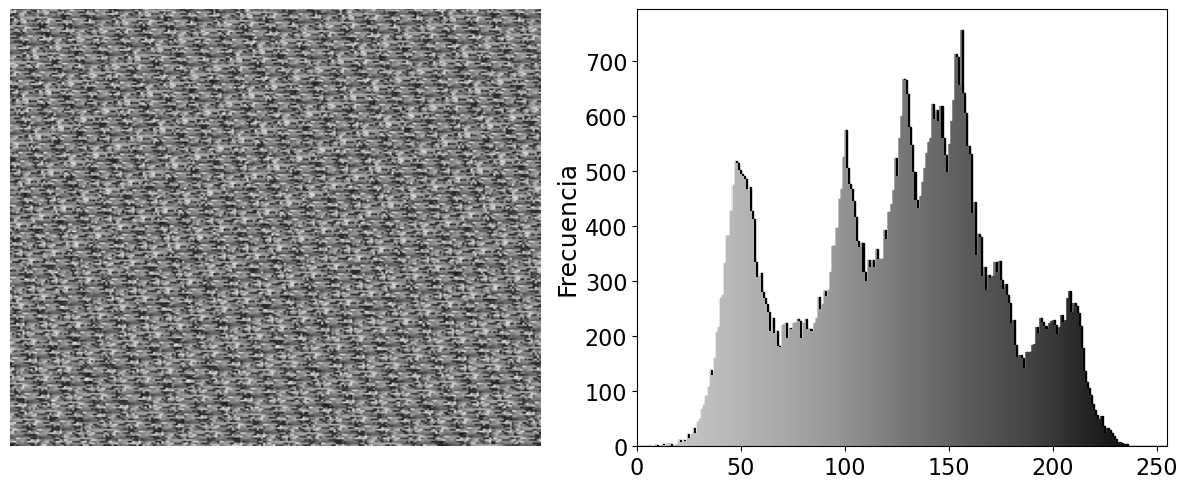

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

In [17]:
import numpy as np
import time
from numba import njit

@njit()
def arnold_numba(img):
    a=22
    b=49
    r, c = img.shape
    pic = np.zeros((r, c), np.uint8)
    for i in range(r):
        for j in range(c):
            x = (i + a*j) % r
            y = (b*i + (1+a*b)*j) % c
            pic[x, y] = img[i, j]
    return pic

lena_shuffle = arnold_numba(lena_arr)
ciphers.plot_image_and_histogram(lena_shuffle)

In [15]:
def enigmarot_cipher(image,xinits,params):
    k=3
    img_shuffled = arnold_numba(image)
    img_array = np.array(img_shuffled)
    n,m = img_array.shape[0],img_array.shape[1]
    startT = time.time()
    sboxes = [Sbox(ciphers.generate_sbox(xinits[i][0],xinits[i][1],f1=params[0],f2=params[1])) for i in range(k)]
    # print(sboxes[0].table)
    # print(sboxes[1].table)
    # print(sboxes[2].table)
    
    cipher_arr = np.zeros((n,m))

    for c in range(n):
        for r in range(m):
            aux = sboxes[0].table[int(img_array[c,r])]
            aux = sboxes[1].table[int(aux)]
            aux = sboxes[2].table[int(aux)]
            cipher_arr[c,r] = aux
            sboxes[k-k].rotation()
            # rot_cont[k-1]=sboxes[k-1].rot_cont
            if sboxes[k-k].rot_cont%256==0 and sboxes[k-k].rot_cont!=0:      
                sboxes[k-2].rotation()
                # rot_cont[k-2]+=1
                # print("Rot 2:")
                # print("table:"+str(sboxes[k-2].table))
                # print("rots:"+str(sboxes[k-2].rot_cont))
            
            if sboxes[k-2].rot_cont%256==0 and sboxes[k-2].rot_cont!=0:
                sboxes[k-1].rotation()
                # rot_cont[k-3]=sboxes[k-3].rot_cont
                sboxes[k-2].rot_cont=0 #?????
                # print("Rot 3:")
                # print("table:"+str(sboxes[k-3].table))
                # print("rots:"+str(sboxes[k-3].rot_cont))
                

            if sboxes[k-1].rot_cont%256==0 and sboxes[k-1].rot_cont!=0:
                print("ya es toda we ",sboxes[k-1].rot_cont)

    endT = time.time()
    print("Time:")
    print(endT - startT)
    print("End, rotcont:")
    print(sboxes[0].rot_cont,sboxes[1].rot_cont,sboxes[2].rot_cont)
    sboxes[0].reset_table()
    sboxes[1].reset_table()
    sboxes[2].reset_table()
    # print(sboxes[0].table)
    # print(sboxes[1].table)
    # print(sboxes[2].table)
    rot_cont = [sboxes[0].rot_cont,sboxes[1].rot_cont,sboxes[2].rot_cont]
    
    return cipher_arr,xinits,rot_cont,sboxes

Time:
0.18039321899414062
End, rotcont:
65536 0 1
Time:
0.13646483421325684
End, rotcont:
65536 0 1
compare pixel values:
110 0
changed position:
(array([45]), array([75]))
changed values in cipher images:
(array([159]), array([186]))


(0.00152587890625, 0.0003291111366421569)

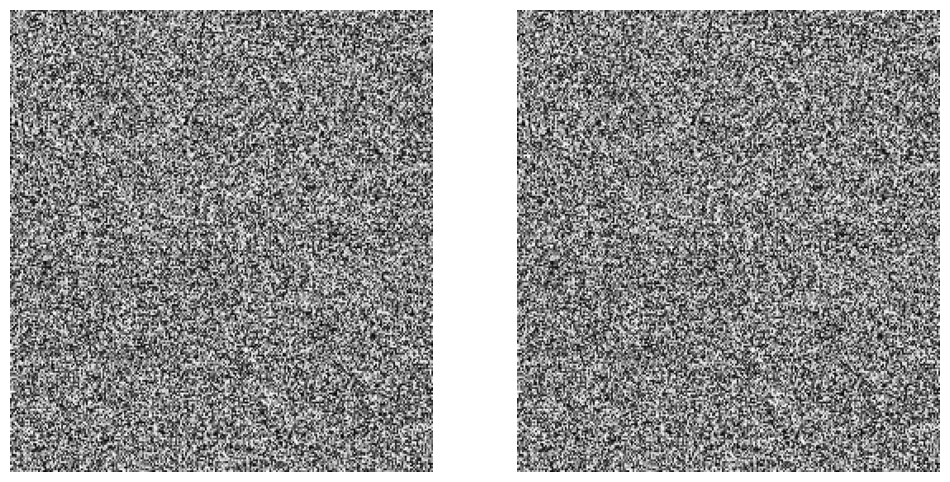

In [18]:
def npcr_analysis(image,xinits,params):
    img1 = np.array(image)
    img1_shape = np.shape(img1)
    img2 = np.array(image)
    xex1,xex2 = random.randint(0,img1_shape[0]),random.randint(0,img1_shape[1])
    img2[xex1,xex2]=0 if img2[xex1,xex2]!=0 else 1
    ciph_img1 = enigmarot_cipher(img1,xinits,params)[0]
    ciph_img2 = enigmarot_cipher(img2,xinits,params)[0]
    C = (img1==img2)
    fig,axs = plt.subplots(1,2,figsize=(12, 6))

    #Verify its pretty much the same image except for one pixel at position (xex1,xex2)
    axs[0].imshow(ciph_img1, cmap='gray', aspect='auto')
    axs[0].axis('off')
    axs[1].imshow(ciph_img2, cmap='gray', aspect='auto')
    axs[1].axis('off')
    print("compare pixel values:")
    print(img1[xex1,xex2],img2[xex1,xex2])
    print("changed position:")
    print(np.where(~C))
    D = (ciph_img1 == ciph_img2)
    print("changed values in cipher images:")
    print(np.where(~D))
    # # 2. Calcular suma de diferencias
    sum_diff = np.sum(~D)
    
    # # 3. Calcular NPCR
    total_pixels = img1.size
    npcr_value = (sum_diff / total_pixels) * 100.0

    width,height=img1_shape
    value=0.0
    for y in range(0,height):
        for x in range(0,width):
            value+=(abs(ciph_img1[x,y]-ciph_img2[x,y])/255)
    
    value=(value/(width*height))*100

    return npcr_value,value

npcr_analysis(lena_img,xinits,params)

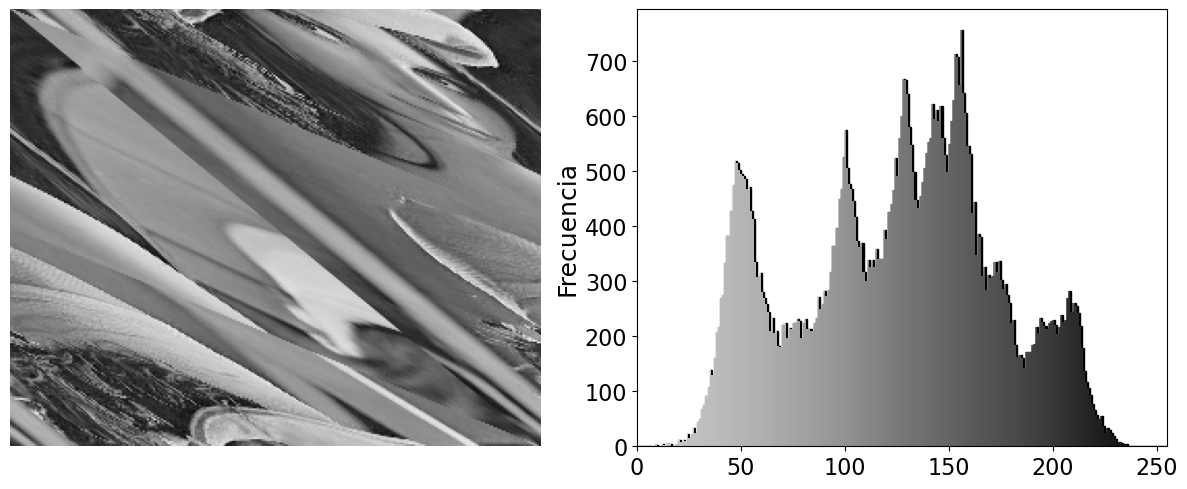

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

In [ ]:
npcr_analysis(lena_img)